In [19]:
# Merged files
# AIEEE
AIEEE = "/home/souvic/mounted/btp/ndata/extracted/Merged/"
AIEEE_2004 = AIEEE+"AIEEE_states/aieee_2004.csv"
AIEEE_2005 = AIEEE+"AIEEE_states/aieee_2005.csv"
AIEEE_2006 = AIEEE+"AIEEE_states/aieee_2006.csv"
AIEEE_2007 = AIEEE+"AIEEE_states/aieee_2007.csv"
AIEEE_2008 = AIEEE+"AIEEE_states/aieee_2008.csv"
AIEEE_2009 = AIEEE+"AIEEE_states/aieee_2009.csv"
AIEEE_2010 = AIEEE+"AIEEE_states/aieee_2010.csv"
AIEEE_2011 = AIEEE+"AIEEE_states/aieee_2011.csv"
AL = [AIEEE_2004, AIEEE_2005, AIEEE_2006, AIEEE_2007, AIEEE_2008, AIEEE_2009, AIEEE_2010, AIEEE_2011]
year = ['2004','2005','2006','2007','2008','2009','2010','2011']

In [20]:
import pandas as pd
import numpy as np

In [21]:
# import pandas as pd
# import itertools
# from string import ascii_lowercase
# import numpy as np

# def preprocess_aieee(df):
#     df['state_no'] = [str(elem).replace('State Rank\n( State code of eligibility :','') for elem in df['state_no']]    
#     df['state_no'] = [state.replace("\xa0","") for state in df.state_no]
#     df['state_no'] = [elem.replace(')','') for elem in df['state_no']]
#     df['state_no'] = [elem.replace('False', '') for elem in df['state_no']]
#     df['state_no'] = [elem.replace('nan', '') for elem in df['state_no']]
#     df['state_no'] = [elem.replace('All India Rank', '') for elem in df['state_no']]
#     df['state_no'] = [elem.replace('Uttaranchal\r\n\t(State code of eligibility/State code of domicile', "5") for elem in df.state_no]
#     df['state_no'] = [state.strip() for state in df.state_no]
#     df['state_no'] = df.state_no.replace('', np.NaN)
#     df = df[df['state_no'].notna()]
#     df['state_no'] = [int(state) for state in df.state_no]
#     return df
    

# def iter_all_strings():
#     num = ['0','1','2','3','4','5','6','7','8','9']
#     for s in itertools.product(num, repeat=2):
#         yield "".join(s)

# def AIEEECaste(aieee):
#     states = pd.read_csv('/home/souvic/mounted/btp/vahini/Name2Demographics/Models/Data/AIEEEData/aieee_states.csv')
#     states = states.set_index('Code')
#     # Use 38 characters as length ( Name #state)
#     states['abbr'] = '00'
#     count = 0
#     for s in iter_all_strings():
#         states.abbr.iloc[count] = s
#         count += 1
#         if (count == 36):
#             break

#     dic = states.to_dict()
#     st = dic['State']

#     df = pd.read_csv(aieee)
# #     df['state_no']= df['state']
#     df = preprocess_aieee(df)
#     df['State'] = df['state_no'].map(st)
#     df.to_csv(aieee)

In [22]:
df = pd.read_csv(AIEEE_2008)

In [23]:
state_data = pd.DataFrame()
state_data['State'] = list(set(df['State']))

In [24]:
a = list(set(state_data['State']))
a.sort()
print(a)

['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep Islands', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Pondicherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']


In [25]:
for i,aieee in enumerate(AL):
    states = list(state_data['State'])
    w = []
    r = []
    df = pd.read_csv(aieee)
    print(aieee)
    for state in states:
        sli = df[df['State']==state]
        try:
            l = sli.groupby('Gender').count()['State']
            wh = l[1] / (l[0]+l[1]) 
            l = sli.groupby('Caste').count()['State']
            rh = l[1] / (l[0]+l[1])
        except:
            if sli.shape[0] == 0:
                wh = 0
                rh = 0
            wh = 0
            rh = 0
        w.append(round(wh*100,2))
        r.append(round(rh*100,2))
    state_data[year[i]+'_women']  = w
    state_data[year[i]+'_res'] = r

/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE_states/aieee_2004.csv
/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE_states/aieee_2005.csv
/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE_states/aieee_2006.csv
/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE_states/aieee_2007.csv
/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE_states/aieee_2008.csv
/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE_states/aieee_2009.csv
/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE_states/aieee_2010.csv
/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE_states/aieee_2011.csv


In [26]:
state_data

,State,2004_women,2004_res,2005_women,2005_res,2006_women,2006_res,2007_women,2007_res,2008_women,2008_res,2009_women,2009_res,2010_women,2010_res,2011_women,2011_res
0,Goa,23.81,33.33,27.59,20.69,23.33,16.67,18.75,3.12,25.81,11.29,28.07,42.11,37.04,53.70,18.92,44.59
1,Chattisgarh,20.00,50.43,17.31,25.00,21.58,26.62,29.03,24.19,34.16,26.24,28.19,52.42,29.21,55.45,25.64,54.21
2,Himachal Pradesh,31.12,39.24,29.57,18.16,33.67,18.56,36.18,18.23,44.12,15.47,45.62,41.48,46.16,41.75,45.90,41.13
3,Mizoram,26.24,21.27,27.97,4.80,25.99,4.37,29.63,5.80,26.86,3.78,26.32,20.33,27.36,23.36,26.55,21.26
4,Manipur,24.80,33.67,21.06,5.71,19.54,8.05,24.24,9.92,23.62,8.28,27.24,36.34,28.02,36.59,26.99,32.62
5,Tamil Nadu,13.49,38.19,12.93,14.64,13.81,14.84,15.00,15.77,15.54,16.13,16.76,41.49,17.48,41.56,17.10,42.18
6,Haryana,28.96,18.33,21.08,4.95,26.72,4.05,27.26,3.20,31.06,4.78,35.10,20.13,35.17,19.35,30.16,19.17
7,Meghalaya,27.81,43.28,31.83,25.21,31.37,22.94,34.41,22.92,33.77,21.07,32.88,41.96,33.28,42.36,32.08,41.03
8,Assam,30.72,46.33,32.68,23.03,35.46,23.60,37.18,23.59,37.60,25.51,38.98,50.65,35.92,51.68,36.36,52.02
9,Maharashtra,31.82,59.09,32.67,27.72,38.41,36.96,42.97,25.00,40.83,37.28,39.35,70.32,46.55,64.94,37.13,66.83


Plot an Indian Map

In [36]:
%%capture
!pip install geopandas

import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt 

In [37]:
shp_gdf = gpd.read_file('Igismap/Indian_States.shp')
shp_gdf.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [38]:
plot_data = pd.DataFrame()
plot_data['State'] = shp_gdf['st_nm']
plot_data['geometry'] = shp_gdf['geometry']

In [39]:
plot_data['State'] = [elem.replace("Andaman & Nicobar Island","Andaman and Nicobar Islands") for elem in plot_data['State']]
plot_data['State'] = [elem.replace("&","and") for elem in plot_data['State']]
plot_data['State'] = [elem.replace("Havelli","Haveli") for elem in plot_data['State']]
plot_data['State'] = [elem.replace("Lakshadweep","Lakshadweep Islands") for elem in plot_data['State']]
plot_data['State'] = [elem.replace("NCT of Delhi","Delhi") for elem in plot_data['State']]
plot_data['State'] = [elem.replace("Puducherry","Pondicherry") for elem in plot_data['State']]

plot_data['State'] = [elem.replace("Arunanchal Pradesh","Arunachal Pradesh") for elem in plot_data['State']]
plot_data['State'] = [elem.replace("Chhattisgarh","Chattisgarh") for elem in plot_data['State']]
plot_data['State'] = [elem.replace("Dadara and Nagar Haveli","Dadra and Nagar Haveli") for elem in plot_data['State']]



In [40]:
merged = plot_data.set_index('State').join(state_data.set_index('State'))

In [41]:
from geopandas import GeoDataFrame

merged = GeoDataFrame(merged)

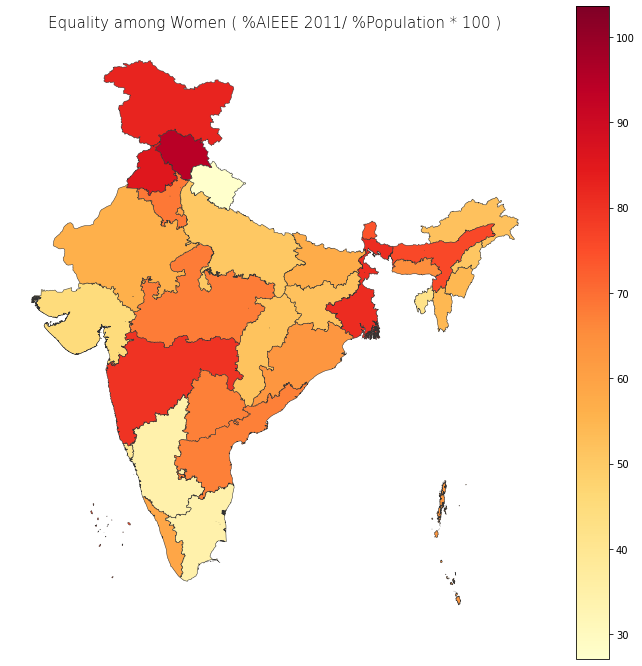

In [42]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Equality among Women ( %AIEEE 2011/ %Population * 100 )',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig1 = merged.plot(column='women_ratio', cmap='YlOrRd', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
fig.savefig("india_map_women_ratio_with_population_aieee.png", dpi=100)

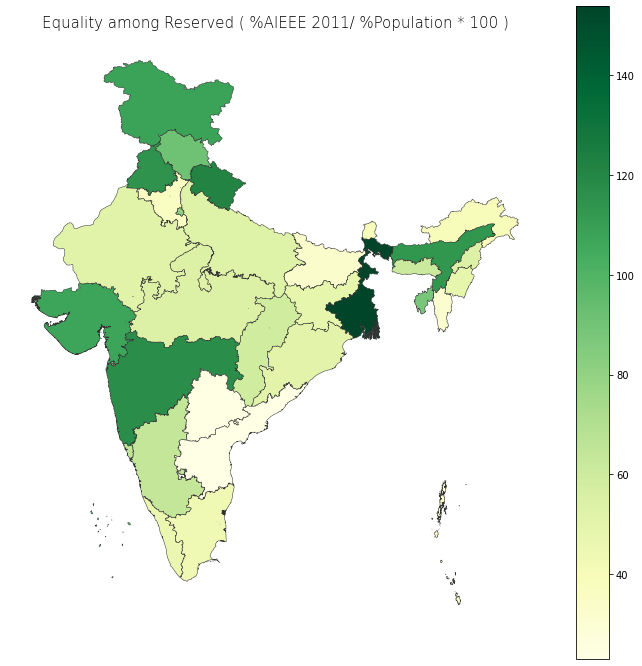

In [43]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Equality among Reserved ( %AIEEE 2011/ %Population * 100 )',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig1 = merged.plot(column='reserved_ratio', cmap='YlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
fig.savefig("india_map_reserved_ratio_with_population_aieee.png", dpi=100)

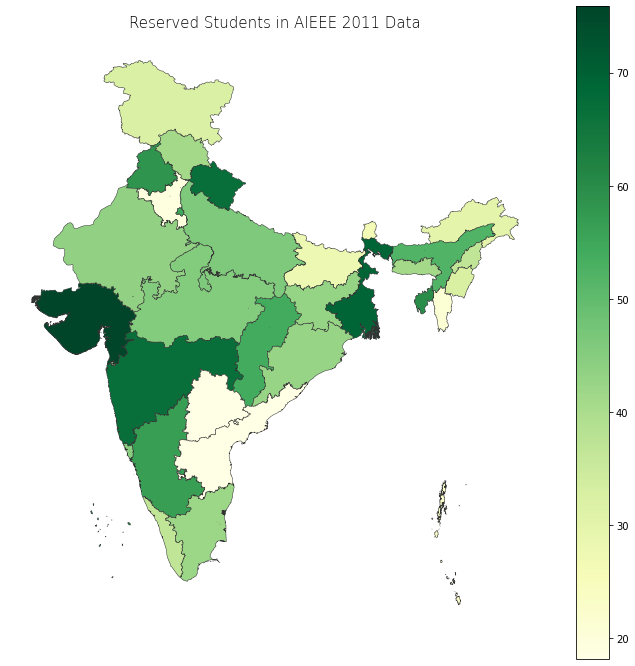

In [71]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Reserved Students in AIEEE 2011 Data',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig1 = merged.plot(column='2011_res', cmap='YlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
fig.savefig("india_map_reserved_2011_aieee.png", dpi=100)

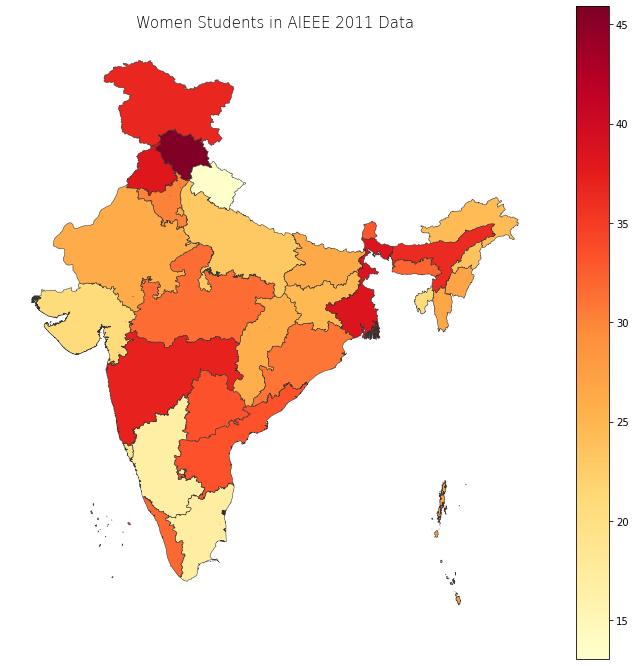

In [73]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Women Students in AIEEE 2011 Data',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig1 = merged.plot(column='2011_women', cmap='YlOrRd', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
fig.savefig("india_map_women_2011_aieee.png", dpi=100)

In [62]:
state_data.to_csv('state_data.csv')

In [131]:
state_data['women'] = (state_data['2004_women']+state_data['2005_women']+state_data['2006_women']+state_data['2004_women']+state_data['2007_women']+state_data['2008_women']+state_data['2009_women']+state_data['2010_women']+state_data['2011_women']).divide(8)
state_data['res'] = (state_data['2004_women']+state_data['2005_women']+state_data['2006_women']+state_data['2004_women']+state_data['2007_women']+state_data['2008_res']+state_data['2009_res']+state_data['2010_res']+state_data['2011_res']).divide(8)


In [63]:
import pandas as pd

state_data = pd.read_csv("state_data.csv")

In [182]:
state_data.head()

,Unnamed: 0,State,2004_women,2004_res,2005_women,2005_res,2006_women,2006_res,2007_women,2007_res,...,2008_res,2009_women,2009_res,2010_women,2010_res,2011_women,2011_res,women_population,ratio,women_ratio
0,0,Jharkhand,19.11,33.41,21.64,12.76,20.81,12.96,21.58,13.66,...,13.72,24.04,40.95,24.90,41.32,24.68,43.17,47.40,0.520675,52.067511
1,1,Dadra and Nagar Haveli,22.07,34.66,21.49,12.83,25.36,14.80,28.70,16.43,...,14.56,32.04,33.11,30.89,35.14,30.60,35.02,38.70,0.790698,79.069767
2,2,Punjab,37.04,44.44,24.36,14.10,42.55,12.77,28.46,15.45,...,21.17,38.16,53.62,36.77,63.23,38.20,58.43,44.75,0.853631,85.363128
3,3,Sikkim,31.58,28.07,32.31,7.69,29.58,9.86,25.27,12.09,...,14.29,39.39,28.03,38.79,22.42,32.95,26.14,44.50,0.740449,74.044944
4,4,Rajasthan,33.33,50.00,28.57,14.29,0.00,0.00,34.38,9.38,...,6.25,27.27,42.42,38.89,38.89,26.09,43.48,46.40,0.562284,56.228448


In [183]:
display = pd.DataFrame()
display['State'] = state_data['State']
display['women'] = state_data['2011_women']
display['res'] = state_data['2011_res']
display['ratio'] = state_data['women_ratio']
display['women_population'] = state_data['women_population']

In [184]:
display.sort_values(by="ratio").head()

,State,women,res,ratio,women_population
15,Uttarakhand,13.06,66.71,27.123572,48.15
16,Tamil Nadu,17.10,42.18,34.337349,49.80
7,Karnataka,16.73,56.59,34.388489,48.65
11,Goa,18.92,44.59,38.890031,48.65
9,Tripura,20.76,59.93,42.024291,49.40


In [185]:
display.sort_values(by="ratio").tail()

,State,women,res,ratio,women_population
34,West Bengal,38.46,69.23,80.968421,47.50
12,Jammu and Kashmir,36.67,32.50,82.497188,44.45
2,Punjab,38.20,58.43,85.363128,44.75
29,Himachal Pradesh,45.90,41.13,94.444444,48.60
20,Daman and Diu,32.00,54.00,103.559871,30.90


In [75]:
display.sort_values(by='women').head()

,State,women,res
15,Uttarakhand,13.06,66.71
7,Karnataka,16.73,56.59
16,Tamil Nadu,17.10,42.18
11,Goa,18.92,44.59
17,Gujarat,20.69,75.86


In [76]:
display.sort_values(by='women').tail()

,State,women,res
12,Jammu and Kashmir,36.67,32.50
13,Maharashtra,37.13,66.83
2,Punjab,38.20,58.43
34,West Bengal,38.46,69.23
29,Himachal Pradesh,45.90,41.13


In [77]:
display.sort_values(by='res').head()

,State,women,res
35,Telangana,33.39,18.16
33,Andhra Pradesh,33.39,18.16
24,Haryana,30.16,19.17
32,Mizoram,26.55,21.26
10,Andaman and Nicobar Islands,27.49,23.02


In [78]:
display.sort_values(by='res').tail()

,State,women,res
31,Lakshadweep Islands,35.57,63.68
15,Uttarakhand,13.06,66.71
13,Maharashtra,37.13,66.83
34,West Bengal,38.46,69.23
17,Gujarat,20.69,75.86


Using Sex Ratio

In [27]:
import pandas as pd

state_data = pd.read_csv("state_data.csv")
sex_ratio = pd.read_csv("women_population.csv")

In [28]:
sex_ratio.head()

,State,SexRatio,Reserved
0,Andaman and Nicobar Islands,876,67.74
1,Andhra Pradesh,993,79.00
2,Arunachal Pradesh,938,77.00
3,Assam,958,46.00
4,Bihar,918,85.00


In [29]:
states = list(state_data['State'])
women_pop = []
reserved_pop = []
for state in states:
    if state == 'Telangana':
        w = ap
    else:
        w = round(list(sex_ratio[sex_ratio['State']==state]['SexRatio'])[0]/ 20 , 2)
    r = list(sex_ratio[sex_ratio['State']==state]['Reserved'])[0]
    if state == 'Andhra Pradesh' :
        ap = w
    women_pop.append(w)
    reserved_pop.append(r)

In [30]:
state_data['women_population'] = women_pop
state_data['res_population'] = reserved_pop

In [32]:
del state_data['Unnamed: 0']

In [31]:
state_data.head(5)

,Unnamed: 0,State,2004_women,2004_res,2005_women,2005_res,2006_women,2006_res,2007_women,2007_res,2008_women,2008_res,2009_women,2009_res,2010_women,2010_res,2011_women,2011_res,women_population,res_population
0,0,Jharkhand,19.11,33.41,21.64,12.76,20.81,12.96,21.58,13.66,23.05,13.72,24.04,40.95,24.90,41.32,24.68,43.17,47.40,89.00
1,1,Dadra and Nagar Haveli,22.07,34.66,21.49,12.83,25.36,14.80,28.70,16.43,32.80,14.56,32.04,33.11,30.89,35.14,30.60,35.02,38.70,67.74
2,2,Punjab,37.04,44.44,24.36,14.10,42.55,12.77,28.46,15.45,36.50,21.17,38.16,53.62,36.77,63.23,38.20,58.43,44.75,51.00
3,3,Sikkim,31.58,28.07,32.31,7.69,29.58,9.86,25.27,12.09,33.61,14.29,39.39,28.03,38.79,22.42,32.95,26.14,44.50,67.74
4,4,Rajasthan,33.33,50.00,28.57,14.29,0.00,0.00,34.38,9.38,18.75,6.25,27.27,42.42,38.89,38.89,26.09,43.48,46.40,85.00


In [33]:
state_data.to_csv("state_data.csv")

In [34]:
state_data['wratio'] = state_data['2011_women'].divide(state_data['women_population'])
state_data['rratio'] = state_data['2011_res'].divide(state_data['res_population'])

In [35]:
state_data['women_ratio'] = state_data['wratio']*100
state_data['reserved_ratio'] = state_data['rratio']*100

Info on table regarding how many datapoints are retrieved after adding state information.

In [6]:
AIEEE = "/home/souvic/mounted/btp/ndata/extracted/Merged/"
OAIEEE_2004 = AIEEE+"AIEEE/aieee_2004.csv"
OAIEEE_2005 = AIEEE+"AIEEE/aieee_2005.csv"
OAIEEE_2006 = AIEEE+"AIEEE/aieee_2006.csv"
OAIEEE_2007 = AIEEE+"AIEEE/aieee_2007.csv"
OAIEEE_2008 = AIEEE+"AIEEE/aieee_2008.csv"
OAIEEE_2009 = AIEEE+"AIEEE/aieee_2009.csv"
OAIEEE_2010 = AIEEE+"AIEEE/aieee_2010.csv"
OAIEEE_2011 = AIEEE+"AIEEE/aieee_2011.csv"
OAL = [OAIEEE_2004, OAIEEE_2005, OAIEEE_2006, OAIEEE_2007, OAIEEE_2008, OAIEEE_2009, OAIEEE_2010, OAIEEE_2011]

AIEEE = "/home/souvic/mounted/btp/ndata/extracted/Merged/"
AIEEE_2004 = AIEEE+"AIEEE_states/aieee_2004.csv"
AIEEE_2005 = AIEEE+"AIEEE_states/aieee_2005.csv"
AIEEE_2006 = AIEEE+"AIEEE_states/aieee_2006.csv"
AIEEE_2007 = AIEEE+"AIEEE_states/aieee_2007.csv"
AIEEE_2008 = AIEEE+"AIEEE_states/aieee_2008.csv"
AIEEE_2009 = AIEEE+"AIEEE_states/aieee_2009.csv"
AIEEE_2010 = AIEEE+"AIEEE_states/aieee_2010.csv"
AIEEE_2011 = AIEEE+"AIEEE_states/aieee_2011.csv"
AL = [AIEEE_2004, AIEEE_2005, AIEEE_2006, AIEEE_2007, AIEEE_2008, AIEEE_2009, AIEEE_2010, AIEEE_2011]
year = ['2004','2005','2006','2007','2008','2009','2010','2011']

In [9]:
import pandas as pd

data = []

for i in range(8):
    old = pd.read_csv(OAL[i])
    new = pd.read_csv(AL[i])
    sizes = [year[i], old.shape[0], new.shape[0]]
    data.append(sizes)
    
df = pd.DataFrame(data, columns=['year', 'Data points', 'Data points with State Info'])


In [10]:
df.head(20)

,year,Data points,Data points with State Info
0,2004,32732,32529
1,2005,48682,44580
2,2006,57907,54511
3,2007,71555,66831
4,2008,95829,88495
5,2009,112579,112571
6,2010,122871,122861
7,2011,123072,123067


In [11]:
df1 = pd.read_csv(AL[6])

In [14]:
states = list(set(df1['State']))

In [13]:
states

{'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chattisgarh',
 'Dadra and Nagar Haveli',
 'Daman and Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Lakshadweep Islands',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Pondicherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

In [20]:
import pandas as pd
from statistics import mean

data = []

for i in range(8):
    new = pd.read_csv(AL[i])
    state_count = []
    for state in states:
        state_count.append(new[new['State']==state].shape[0])
    avg = mean(state_count)
    mini = min(state_count)
    mini_state = states[state_count.index(mini)]
    maxi = max(state_count)
    maxi_state = states[state_count.index(maxi)]
    sizes = [year[i], avg, mini, mini_state, maxi, maxi_state]
    data.append(sizes)
    
df = pd.DataFrame(data, columns=['year', 'Avg datapoints per state', 'Minimum state data', 'Minimum State', 'Maximum state data', 'Maximum State'])


In [21]:
df.head(10)

,year,Avg datapoints per state,Minimum state data,Minimum State,Maximum state data,Maximum State
0,2004,929.400000,4,Uttar Pradesh,3718,Himachal Pradesh
1,2005,1273.714286,0,Pondicherry,7805,Tamil Nadu
2,2006,1557.457143,0,Pondicherry,8790,Tamil Nadu
3,2007,1909.457143,13,Uttar Pradesh,11246,Tamil Nadu
4,2008,2528.428571,2,West Bengal,13972,Tamil Nadu
5,2009,3216.314286,3,West Bengal,16839,Tamil Nadu
6,2010,3510.314286,5,West Bengal,17338,Tamil Nadu
7,2011,3516.200000,13,West Bengal,17154,Tamil Nadu
